# 2D Allen–Cahn Equation: Simulation

This notebook simulates the 2D Allen-Cahn equation, a fundamental model for phase separation and pattern formation. We solve the equation using a spectral method with Fourier transforms for spatial discretization and a semi-implicit time-stepping scheme.

The equation is given by:
$$u_t = \epsilon^2 \Delta u + \lambda u - u^3$$
on a periodic domain $[0,1] \times [0,1]$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

## Parameters
Define the simulation parameters:
- `N`: Grid resolution.
- `epsilon`: Controls the interface width.
- `lam`: Bifurcation parameter.
- `dt`: Time step size.
- `n_steps`: Total number of simulation steps.

In [2]:
N = 96
epsilon = 0.005
lam = 0.3
dt = 0.01
n_steps = 20000
steps_per_frame = 100

## Spatial grid and wavenumbers
Set up the computational grid and the corresponding wavenumbers for the Fourier transform. This is essential for the spectral method.

In [3]:
kx = np.concatenate((np.arange(N/2), np.arange(-N/2, 0)))
ky = kx
Kx, Ky = np.meshgrid(kx, ky)
K2 = Kx**2 + Ky**2

## Initial condition
The simulation is initialized with small random perturbations around a mean value. This allows instabilities to grow and form patterns. An alternative, prescribed initial condition is also provided.

In [4]:
# random initial condition
u = 0.1 * np.random.randn(N, N)

# prescribed initial condition
x = np.arange(N) / N
X, Y = np.meshgrid(x,x)
# u = np.cos(2 * np.pi * X) * np.cos(2 * np.pi * Y)
# u = np.sin(2 * np.pi * X) * np.sin(2 * np.pi * Y)

## Simulation
The core of the simulation. A semi-implicit Euler scheme is used for time evolution. The linear part of the equation is treated implicitly, while the nonlinear part is treated explicitly. This allows for a larger time step than a fully explicit method.

In [5]:
# spectral operator
L = -epsilon**2 * (2 * np.pi)**2 * K2 + lam

u_hat = np.fft.fft2(u)

u_movie = [u]

for i in range(n_steps):
    u_cubed_hat = np.fft.fft2(u**3)

    u_hat_new = (u_hat + dt * (-u_cubed_hat)) / (1 - dt * L)
    
    u_hat = u_hat_new
    u = np.real(np.fft.ifft2(u_hat))

    if (i+1) % steps_per_frame == 0:
        u_movie.append(u)

## Animation
The simulation results are visualized as an animation, showing the time evolution of the pattern.

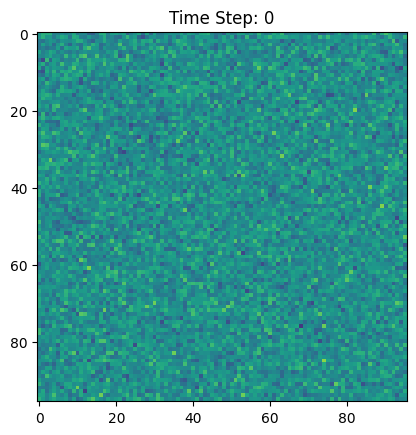

In [6]:
fig, ax = plt.subplots()
im = ax.imshow(u, animated=True)

def update(frame):
    """Update function for the animation."""
    im.set_array(u_movie[frame])
    ax.set_title(f'Time Step: {frame * steps_per_frame}')
    return im,

# Create the animation
anim = FuncAnimation(fig, update, frames=len(u_movie), blit=False, interval=50)

# Display the animation
HTML(anim.to_jshtml())